In [1]:
# ML용 공통 코드

# 파이썬
# ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 공통 모듈 임포트
import numpy as np
import pandas as pd
import os

# 깔끔한 그래프 출력을 위해 %matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
# 이미지를 저장할 디렉토리 생성
os.makedirs(IMAGES_PATH, exist_ok=True)

# 이미지 저장
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

from matplotlib import font_manager, rc
import platform

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
    
    
mpl.rcParams['axes.unicode_minus'] = False
# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한
%precision 3

# 그래픽 출력을 좀 더 고급화하기 위한 라이브러리
import seaborn as sns

# 과학 기술 통계 라이브러리
import scipy as sp
from scipy import stats

# 사이킷런 ≥0.20 필수
# 0.20 이상 버전에서 데이터 변환을 위한 Transformer 클래스가 추가됨
import sklearn
assert sklearn.__version__ >= "0.20"

# 노트북 실행 결과를 동일하게 유지하기 위해 시드 고정
# 데이터를 분할할 때 동일한 분할을 만들어 냄
np.random.seed(21)


## BDSCAN

### 반달 모양의 데이터 군집

(1000, 2)


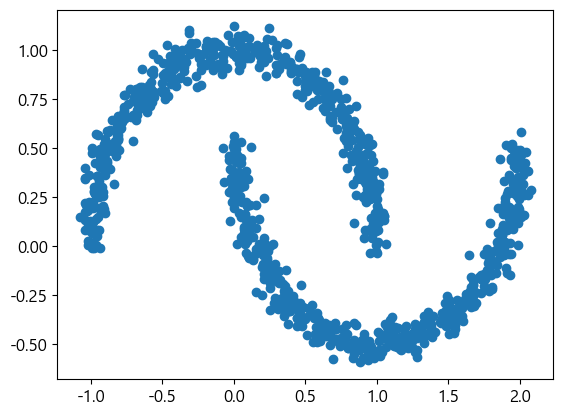

In [7]:
# 반달 모양의 데이터 생성

from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 1000, noise = 0.05, random_state = 21)
# 데이터 확인
#print(type(X))
print(X.shape)
plt.scatter(x = X[:,0], y = X[:, 1])

In [10]:
#eps(epsilon 을 0.05, min_samples 를 5로 설정해서 DBSCAN 을 수행

from sklearn.cluster import DBSCAN

# 모델 생성, 훈련
dbscan = DBSCAN(eps = 0.05, min_samples = 5)
dbscan.fit(X)

# 군집이 적용된 결과 확인 - (-1)은 잡음 포인트
print(dbscan.labels_[:30])
# 전체 1000개는 너무 많으므로 일부만 레이블을 확인
# 각 군집에 해당하는 레이블을 숫자로 가지고 있음

[ 0  1  2  2  3  3  5  4  6  5  3  1  6  6  6  3  0  3 -1  5  5  1  5  4
  4  5  4  6  2  2]


In [17]:
# 데이터 중 핵심 포인트의 갯수 확인
print(len(dbscan.core_sample_indices_))

# 핵심 포인트의 인덱스 확인
print(dbscan.core_sample_indices_[:20])

# 핵심 포인트의 실제 값(좌표) 확인
print(dbscan.components_[:10])


822
[ 0  1  2  3  4  5  7  9 10 11 12 13 15 16 17 19 20 21 22 23]
[[-0.978 -0.009]
 [-0.785  0.634]
 [ 1.653 -0.293]
 [ 1.491 -0.367]
 [ 0.203 -0.093]
 [ 0.666 -0.403]
 [-0.213  0.98 ]
 [ 0.499  0.867]
 [ 0.578 -0.441]
 [-0.824  0.598]]


In [18]:
# 분류된 클러스터 확인
print(np.unique(dbscan.labels_))

[-1  0  1  2  3  4  5  6  7]


In [19]:
# epsilon 값 수정 - 0.05 에서 0.2로 수정

dbscan = DBSCAN(eps = 0.2, min_samples = 5)
dbscan.fit(X)

# 결과 확인
print(len(dbscan.core_sample_indices_))
print(dbscan.core_sample_indices_[:20])
print(dbscan.components_[:10])
print(np.unique(dbscan.labels_))

1000
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[[-9.776e-01 -9.087e-03]
 [-7.852e-01  6.340e-01]
 [ 1.653e+00 -2.929e-01]
 [ 1.491e+00 -3.669e-01]
 [ 2.029e-01 -9.350e-02]
 [ 6.655e-01 -4.033e-01]
 [ 7.810e-01  7.523e-01]
 [-2.130e-01  9.804e-01]
 [ 3.675e-04  1.937e-01]
 [ 4.992e-01  8.667e-01]]
[0 1]


### DBSCAN 의 결과 시각화

In [30]:
def plot_dbscan(dbscan, X, size, show_xlabels = True, show_ylabels = True):
    # 데이터의 갯수만큼 배열을 만들고 핵심 포인트의 경우는 True로 설정
    core_mask = np.zeros_like(dbscan.labels_, dtype = bool)
    core_mask[dbscan.core_sample_indices_] = True
    # 이상치는 핵심 포인트와 반대로 설정
    anomal_mask = (dbscan.labels_ == -1)
    # 핵심 포인트도 아니고 이상치도 아닌 이웃 포인트 설정
    non_core_mask = ~(core_mask | anomal_mask)
    
    cores = dbscan.components_
    anomals = X[anomal_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],c = dbscan.labels_[core_mask],
               marker = 'o', s = size, cmap = 'Paired')
    plt.scatter(cores[:, 0], cores[:, 1],c = dbscan.labels_[core_mask],
               marker = '*', s = 20, )
    plt.scatter(anomals[:, 0], anomals[:, 1],c = dbscan.labels_[anomal_mask],
               marker = 'x', s = 100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1],c = dbscan.labels_[non_core_mask],
               marker = '^', s = 30)
    
    # 축의 레이블 설정
    if show_xlabels:
        plt.xlabel('X_1', fontsize = 16)
    else:
        plt.tick.params(labelbottom = False)
        
    if show_ylabels:
        plt.xlabel('X_2', fontsize = 16)
    else:
        plt.tick.params(labelleft = False)
        
    # 제목 설정
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples),
              fontsize=14)


In [27]:
# epsilon 조정

dbscan1 = DBSCAN(eps = 0.05, min_samples = 5)
dbscan1.fit(X)

dbscan2 = DBSCAN(eps = 0.1, min_samples = 5)
dbscan2.fit(X)

dbscan3 = DBSCAN(eps = 0.2, min_samples = 5)
dbscan3.fit(X)

DBSCAN(eps=0.2)

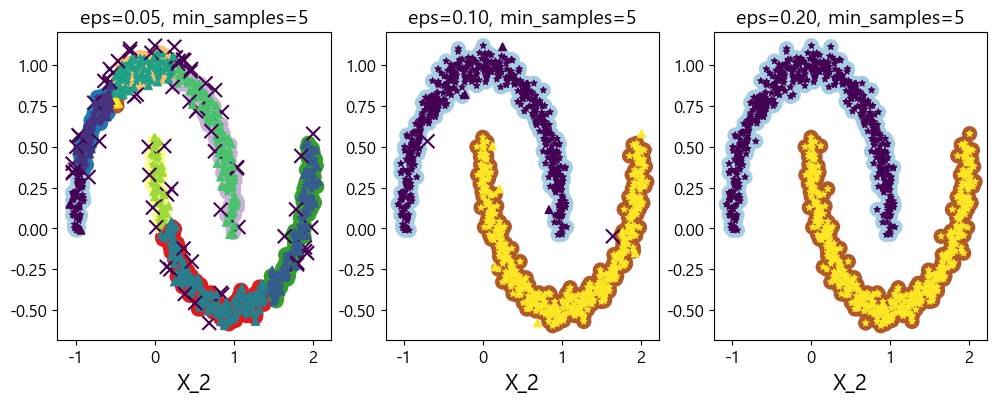

In [31]:
# 결과 확인

plt.figure(figsize = (12, 4))

plt.subplot(1, 3, 1)
plot_dbscan(dbscan1, X, size = 100)

plt.subplot(1, 3, 2)
plot_dbscan(dbscan2, X, size = 100)

plt.subplot(1, 3, 3)
plot_dbscan(dbscan3, X, size = 100)

plt.show()

In [33]:
# 새로운 데이터에 대한 예측 - predict 함수를 제공하지 않음
# 다른 분류 알고리즘을 사용 - KNN

from sklearn.neighbors import KNeighborsClassifier

# 군집을 수행한 결과를 가지고 분류 모델이 훈련
knn = KNeighborsClassifier(n_neighbors = 5)
# 이전의 dbscan 에서 feature 와 target 을 설정
knn.fit(dbscan3.components_, dbscan3.labels_[dbscan3.core_sample_indices_])


KNeighborsClassifier()

In [37]:
# 분류 모델이 훈련한 결과를 가지고 예측

# 예측에 사용할 데이터 생성
X_new = np.array([[-0.5, 0], [0, 1], [0, 0.6], [2, 1]])

# 새로운 데이터를 사용한 예측
y_pred = knn.predict(X_new)
print(y_pred)
# 확률
y_pred_proba = knn.predict_proba(X_new)
print(y_pred_proba)

[0 0 1 1]
[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


## KMeans, GMM, DBSCAN 비교

### DataFrame 과 클러스터링 된 결과를 받아서 시각화 하는 함수

In [45]:
# 함수 생성
# 클러스터 결과, 데이터(데이터 프레임), 라벨 이름을 받아서 수행
def visualize_cluster_plot(clusterobj, dataframe, label_name, is_center = True):
    # 클러스터의 중앙점 찾기
    if is_center:
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers = ['o', 's', '^', 'x', '*']
    
    # 이상치 여부 판단
    isNoise = False
    # 각 클러스터 순회
    for label in unique_labels:
        # 일치하는 라벨만 가져오기
        label_cluster = dataframe[dataframe[label_name] == label]
        
        # 군집 분류(cluster_legend)
        # 군집이 -1 이면 Noise
        if label == -1:
            cluster_legend = 'Noise'
            isNoise = True
        else:
            # 각 군집은 결과가 숫자로 분류되므로 앞에 Cluster 를 붙임
            cluster_legend = 'Cluster ' + str(label)
        
        # scatter 그리기
        plt.scatter(x = label_cluster['feature1'], y = label_cluster['feature2'],
                   s = 100, edgecolor = 'k', marker = markers[label],
                   label = cluster_legend)
        
        # 중앙점 표시
        if is_center:
            center_coord = centers[label]
            plt.scatter(x = center_coord[0], y = center_coord[1], s = 250,
                       color = 'white', edgecolor = 'k',
                       marker = '$%d$' % label)
        
    # 범례 설정
    if isNoise:
        legend_loc = 'upper center'
    else:
        legend_loc = 'upper left'
            
    plt.legend(loc = legend_loc)
        
    plt.show()
        
        
        

### 샘플 데이터 생성

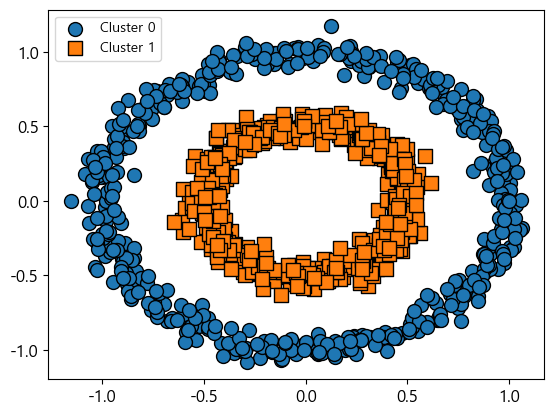

In [46]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples = 1000, shuffle = True, noise = 0.05,
                   random_state = 21, factor = 0.5)
clusterDF = pd.DataFrame(data = X, columns = ['feature1', 'feature2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', is_center = False)

### K-Means 적용 (cluster 2개)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


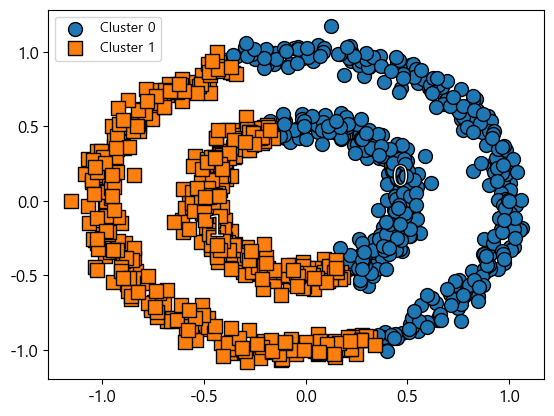

In [49]:
from sklearn.cluster import KMeans

# 2개의 클러스터로 구분
kmeans = KMeans(n_clusters = 2, max_iter = 1000, random_state = 21)
kmeans_labels = kmeans.fit_predict(X)

clusterDF['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', is_center = True)

### GMM 적용 (2개의 클러스터)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


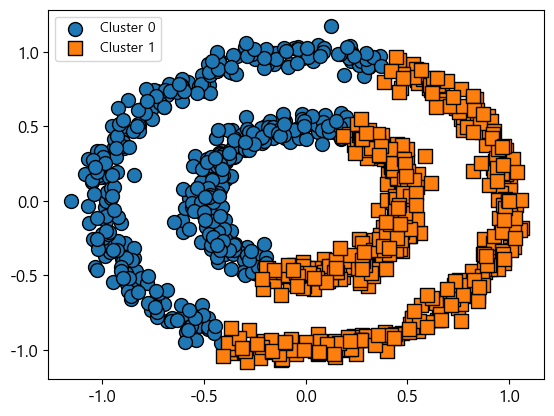

In [51]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components = 2, random_state = 21)
gmm_label = gmm.fit(X).predict(X)
clusterDF['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', is_center = False)

### DBSCAN

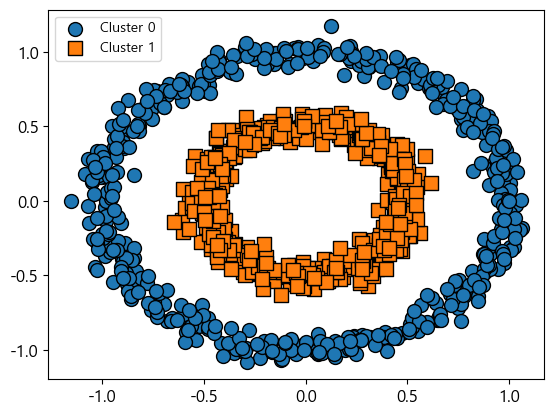

In [54]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.2, min_samples = 5)
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels

visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', is_center = False)

## BIRCH

In [59]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
#print(X[:5])

# 모델 생성 및 훈련
from sklearn.cluster import Birch

brc = Birch(n_clusters = 3)
brc.fit(X)

# 결과 확인 - 데이터 비교
print(iris.target)
y_pred = brc.predict(X)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
